In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
RB = pd.read_csv('HB.csv', engine='python')

In [4]:
RB.head()

,RB_name,Receptions,Carries,Rush_TD,Rec_TD,Total_TDs,Team
0,Derrick Henry,18,310,16,2,18,Titans
1,Austin Ekler,88,132,8,3,11,Chargers
2,Nick Chubb,36,295,8,0,8,Browns
3,Christian McCaffrey,116,287,15,4,19,Panthers
4,Saquon Barkley,52,217,6,2,8,Giants


In [5]:
phi = np.linspace(0, 2*np.pi, 20)
x = np.sin(phi)
y = np.cos(phi)
rgb_cycle = np.vstack((            # Three sinusoids
    .5*(1.+np.cos(phi          )), # scaled to [0,1]
    .5*(1.+np.cos(phi+2*np.pi/3)), # 120° phase shifted.
    .5*(1.+np.cos(phi-2*np.pi/3)))).T # Shape = (60,3)

<IPython.core.display.Javascript object>


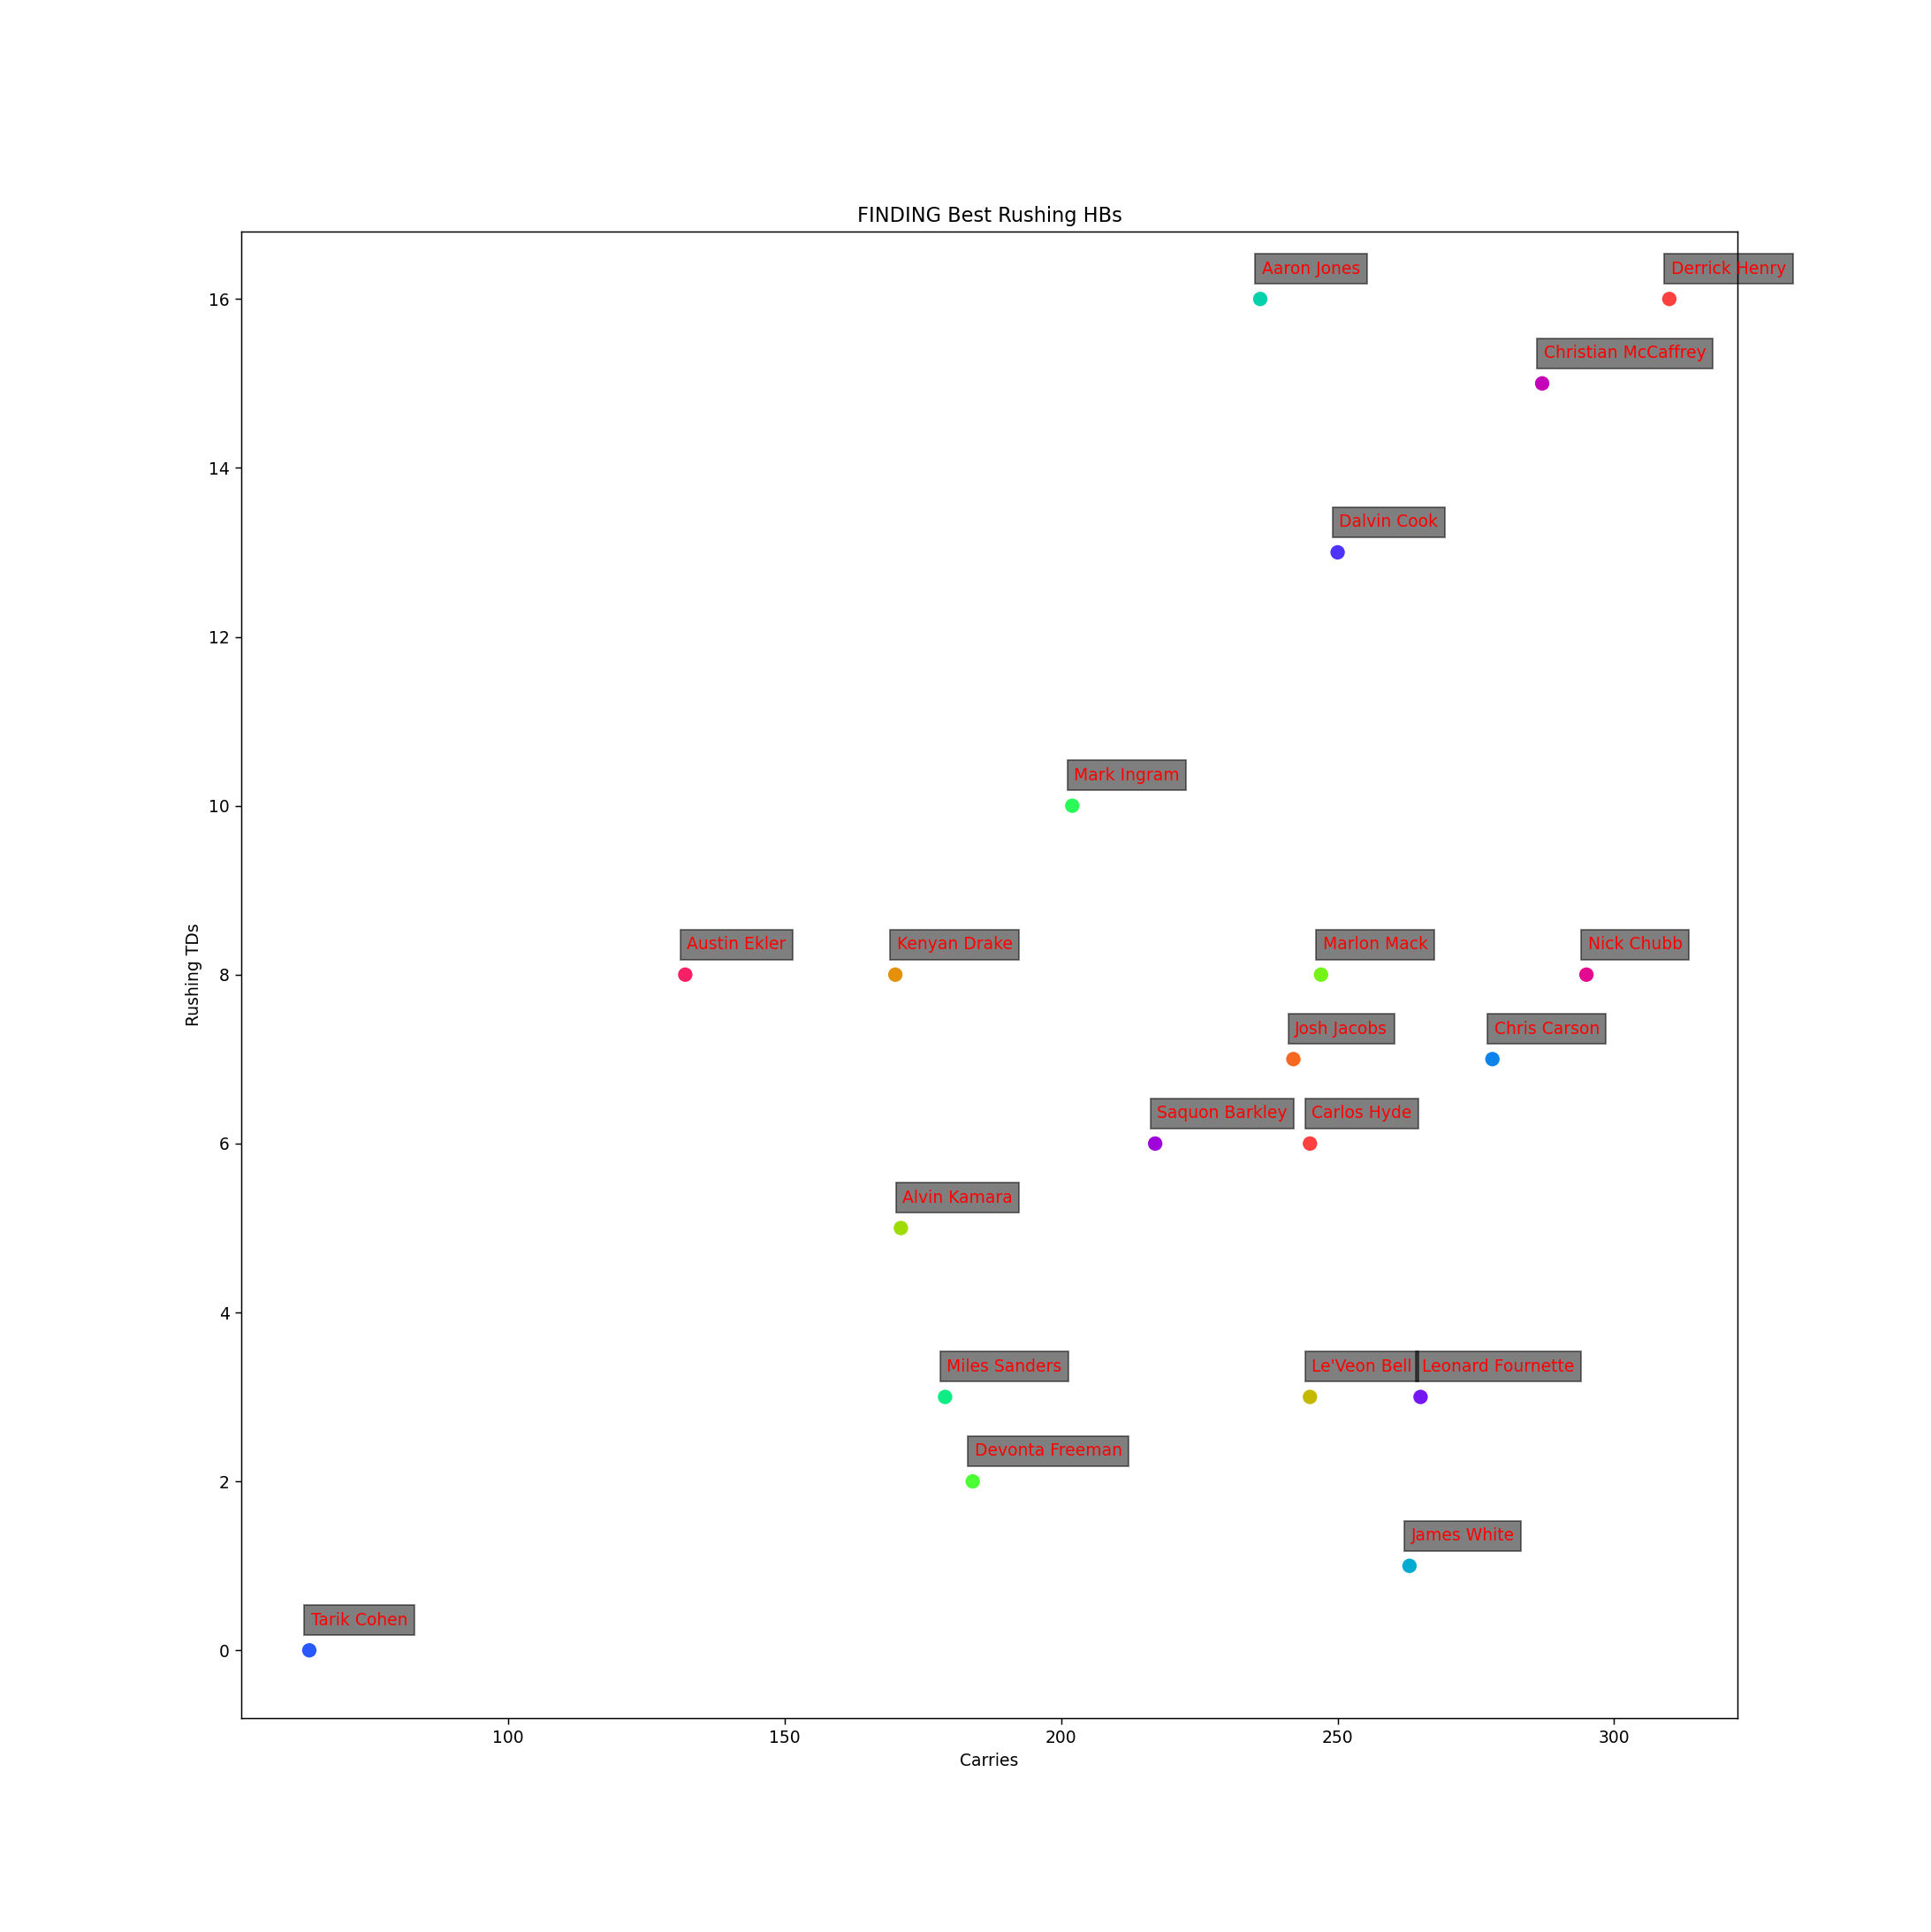

In [6]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = RB, x = 'Carries', y = 'Rush_TD', c = rgb_cycle, s = 90)

plt.title("FINDING Best Rushing HBs")
plt.xlabel("Carries")
plt.ylabel("Rushing TDs")

for i in range(RB.shape[0]):
    plt.text(x = RB.Carries[i]+0.3,y= RB.Rush_TD[i]+0.3,s= RB.RB_name[i], 
          fontdict=dict(color= 'red',size=10),
          bbox=dict(facecolor='black',alpha=0.5))

<IPython.core.display.Javascript object>


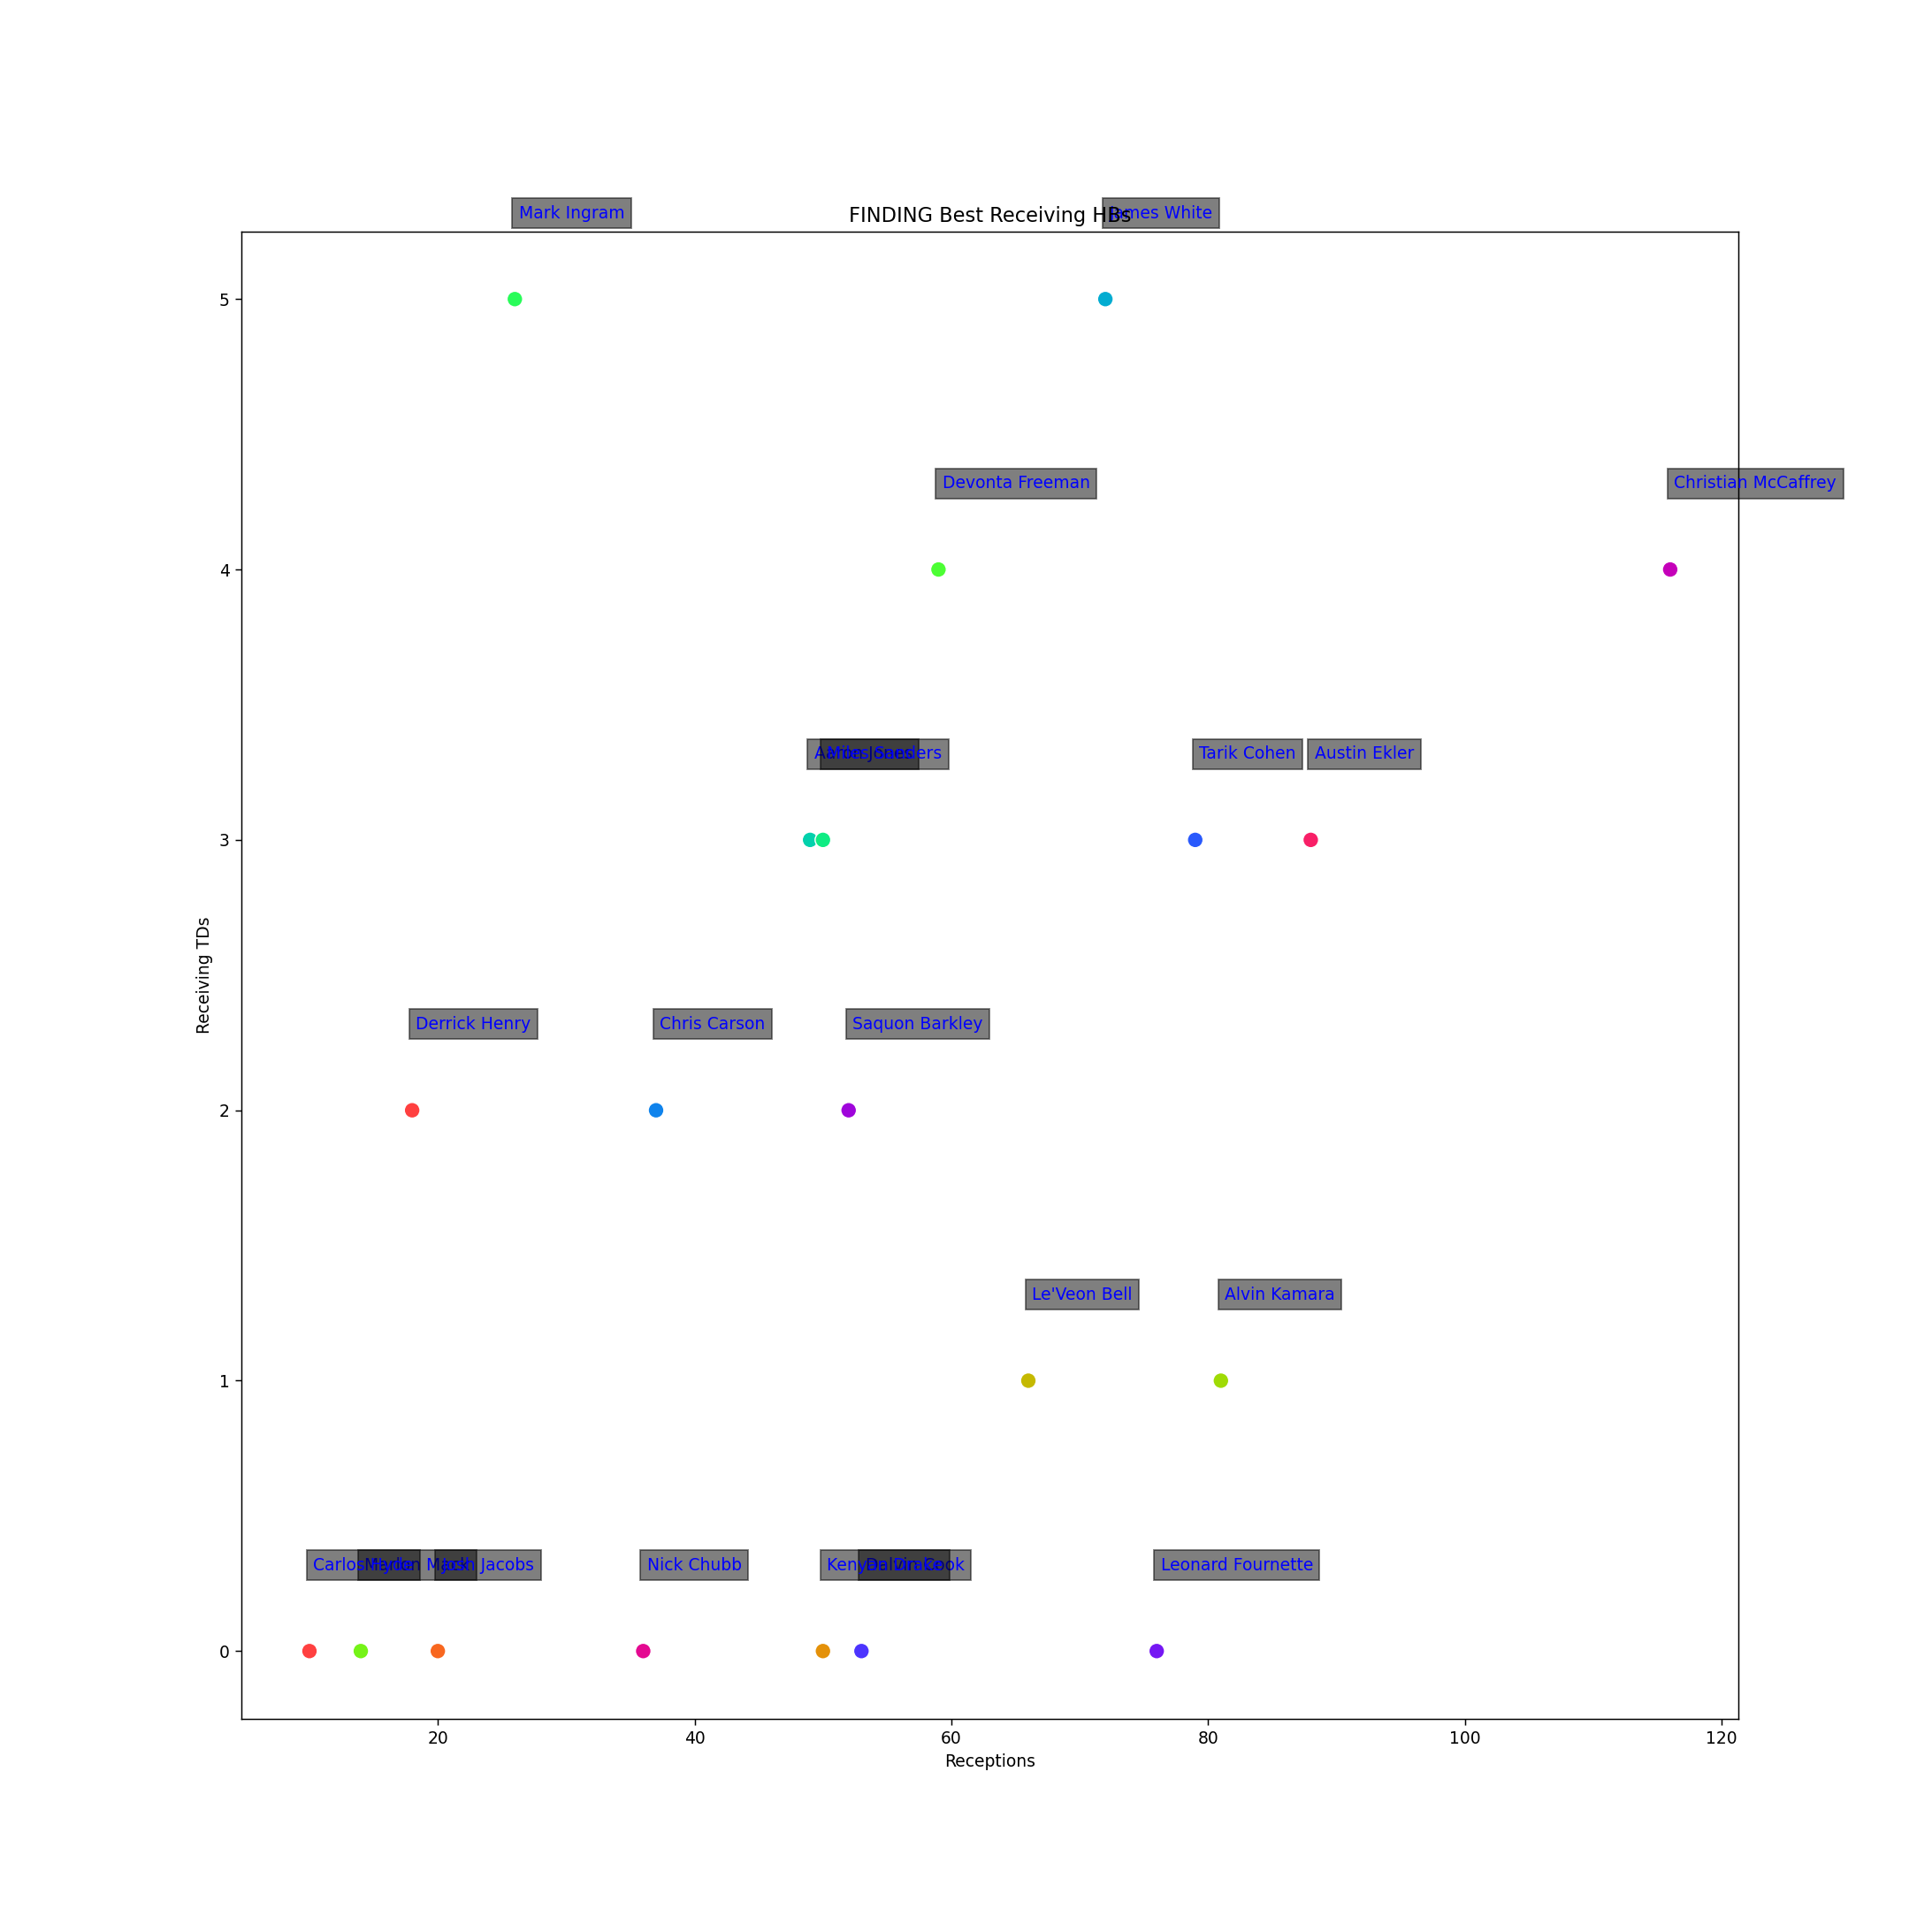

In [7]:
plt.figure(figsize = (12, 12))
sns.scatterplot(data = RB, x = 'Receptions', y = 'Rec_TD', c = rgb_cycle, s = 90)

plt.title("FINDING Best Receiving HBs")
plt.xlabel("Receptions")
plt.ylabel("Receiving TDs")

for i in range(RB.shape[0]):
    plt.text(x = RB.Receptions[i]+0.3,y= RB.Rec_TD[i]+0.3,s= RB.RB_name[i], 
          fontdict=dict(color= 'blue',size=10),
          bbox=dict(facecolor='black',alpha=0.5))

<IPython.core.display.Javascript object>


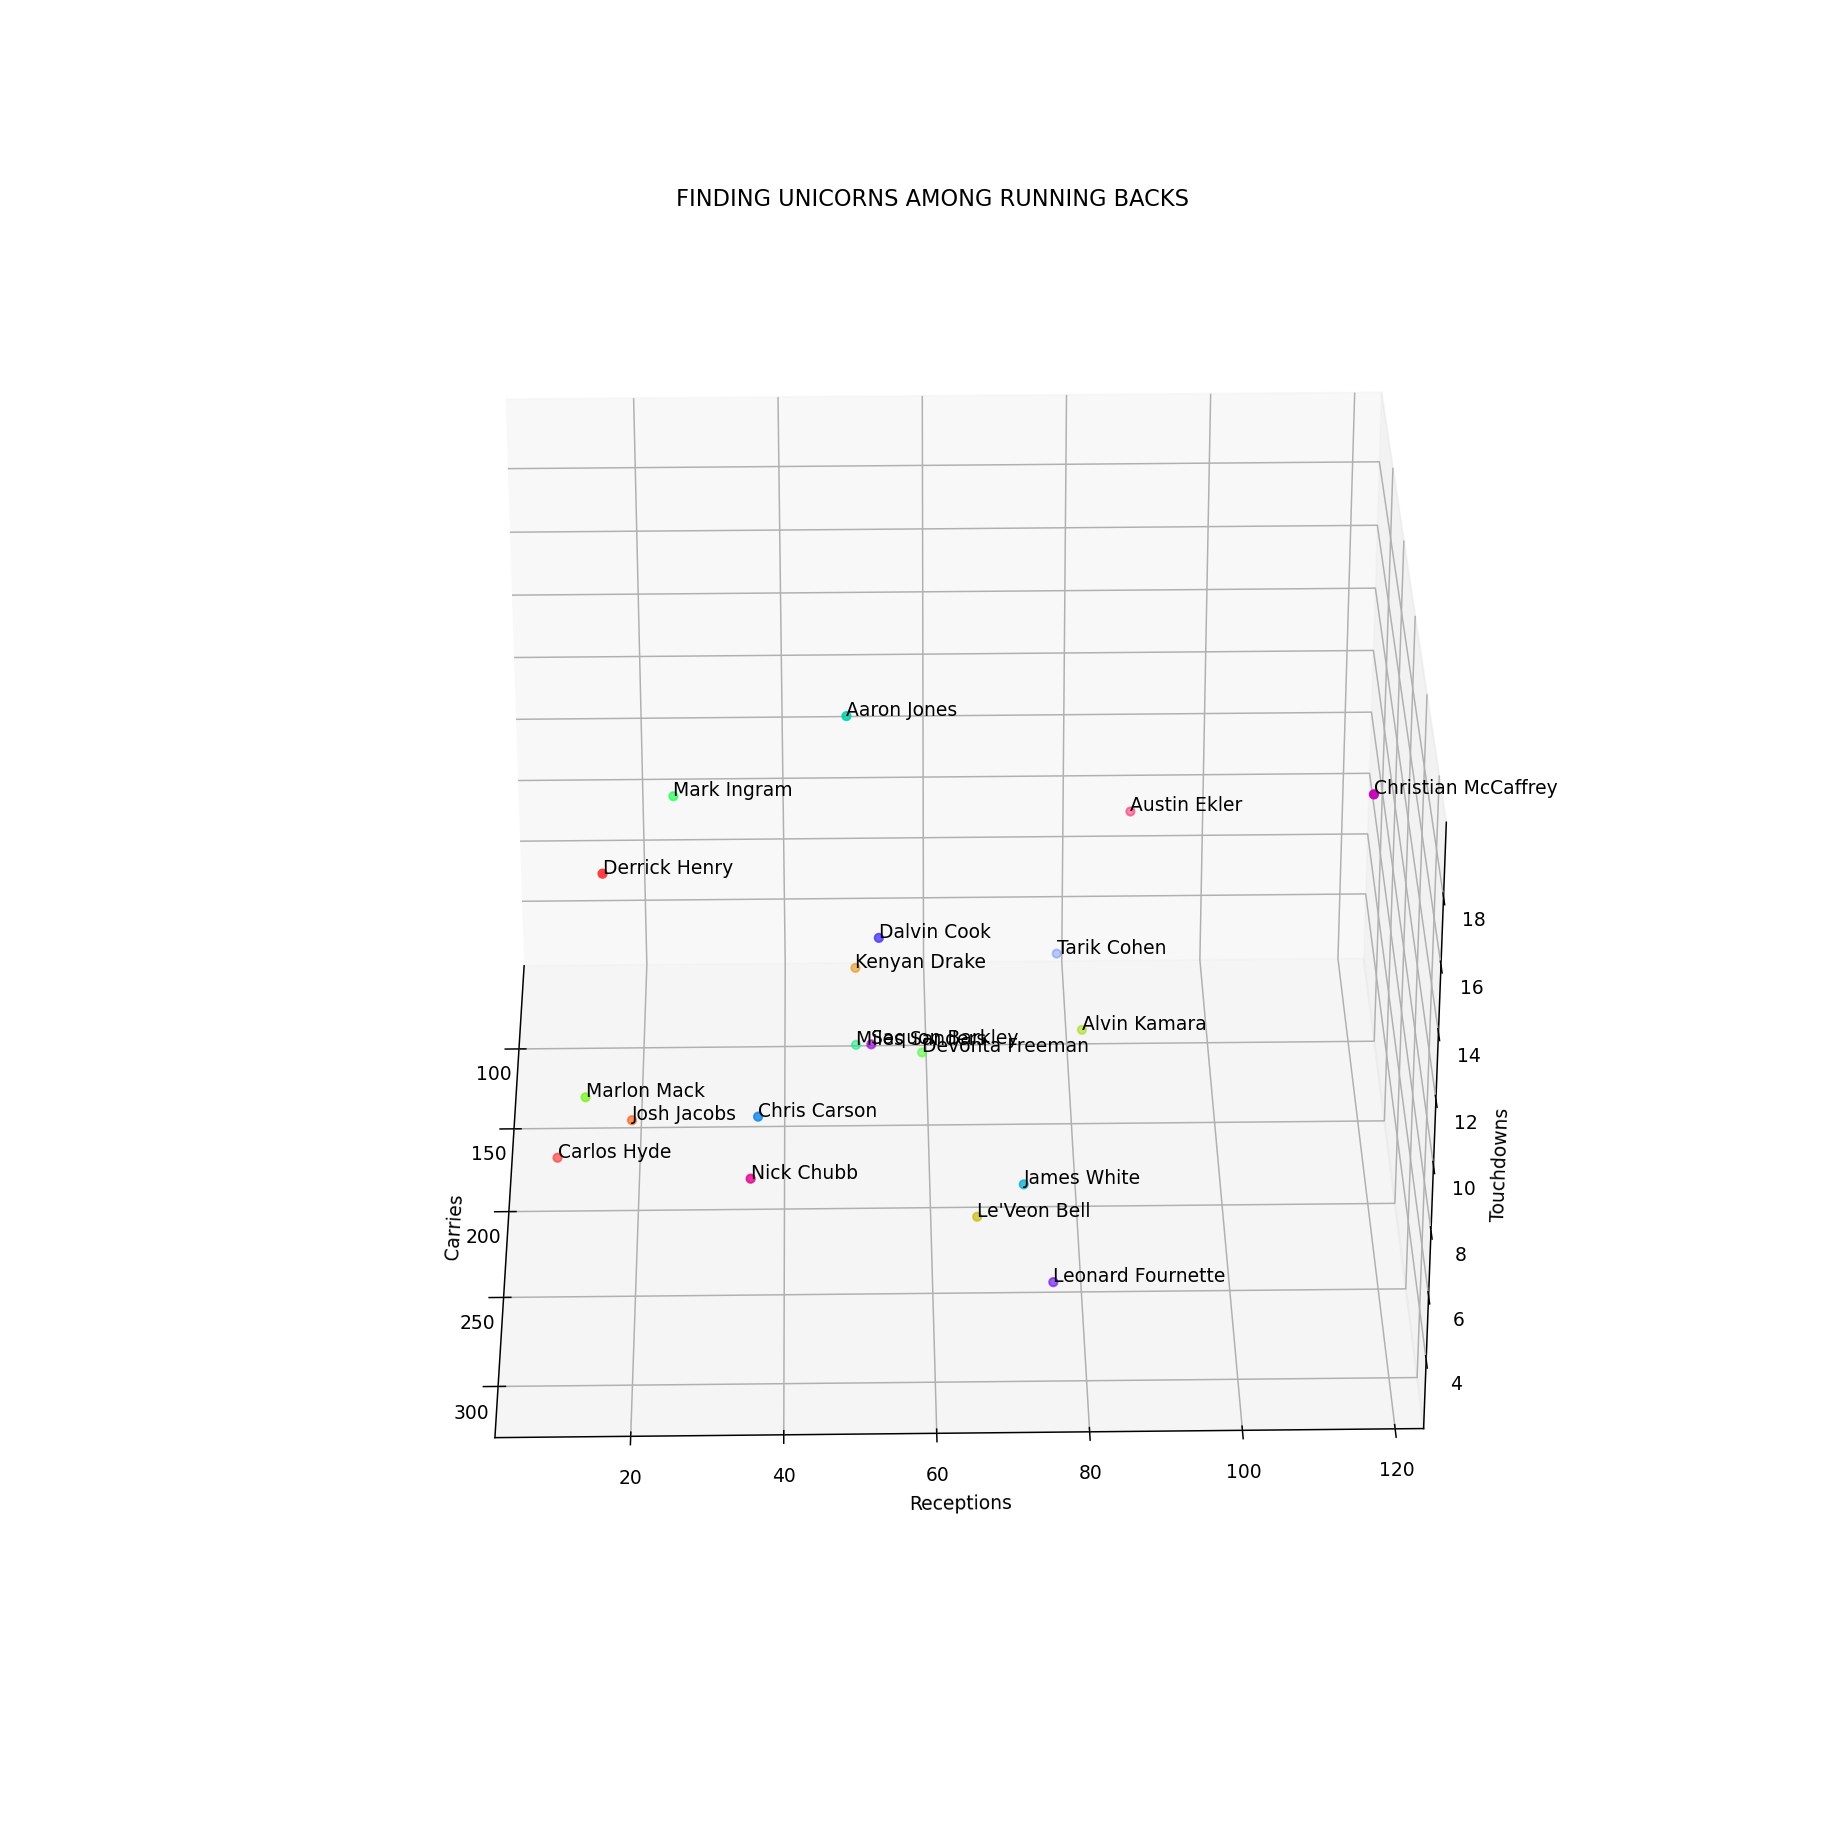

In [8]:

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

z = RB['Total_TDs'].values
x = RB['Carries'].values
y = RB['Receptions'].values
w = RB['RB_name'].values

ax.scatter(x, y, z, c= rgb_cycle, marker='o')



plt.title("FINDING UNICORNS AMONG RUNNING BACKS")
plt.xlabel("Carries")
plt.ylabel("Receptions")
ax.set_zlabel("Touchdowns")

for x,y,z,i in zip(x,y,z,w):
    ax.text(x,y,z,i)
                     
            
for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)